# Multi-Layered Neural Network

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
import skimage

#from numpy import asarray
from matplotlib import image
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *


In [2]:
train_dataset = h5py.File('train_catvnoncat.h5', 'r')
train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
train_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

test_dataset = h5py.File('test_catvnoncat.h5', "r")
test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
test_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

train_y = train_y_orig.reshape((1, train_y_orig.shape[0]))
test_y = test_y_orig.reshape((1, test_y_orig.shape[0]))

classes = np.array(test_dataset["list_classes"][:])


In [3]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [4]:
m_train = train_x_orig.shape[0]
m_test = test_x_orig.shape[0]
num_px = train_x_orig.shape[1]


print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_x_orig.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_x_orig.shape))
print ("test_set_y shape: " + str(test_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


y = 1. It's a cat picture.


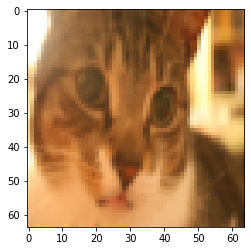

In [5]:
index = 200
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [6]:
layers_dims = [12288, 20, 7, 5, 1]

In [7]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    #np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims) 
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost
        cost = compute_cost(AL, Y)
    
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


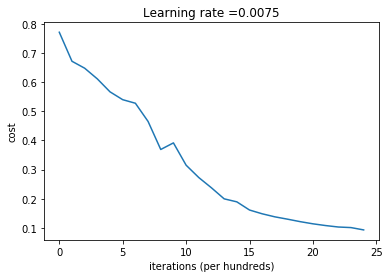

In [8]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [9]:
pred_train = predict(train_x, train_y, parameters)
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.9856459330143539
Accuracy: 0.8


In [64]:
layers_dims_2 = [12288, 7, 1]   ## Try a different model

Cost after iteration 0: 0.695046
Cost after iteration 100: 0.576272
Cost after iteration 200: 0.601729
Cost after iteration 300: 0.570167
Cost after iteration 400: 0.569466
Cost after iteration 500: 0.538526
Cost after iteration 600: 0.669961
Cost after iteration 700: 0.601476
Cost after iteration 800: 0.389018
Cost after iteration 900: 0.571639
Cost after iteration 1000: 0.307425
Cost after iteration 1100: 0.458719
Cost after iteration 1200: 0.295146
Cost after iteration 1300: 0.347513
Cost after iteration 1400: 0.304181
Cost after iteration 1500: 0.469218
Cost after iteration 1600: 0.266268
Cost after iteration 1700: 0.255969
Cost after iteration 1800: 0.345605
Cost after iteration 1900: 0.258050
Cost after iteration 2000: 0.263804
Cost after iteration 2100: 0.254711
Cost after iteration 2200: 0.252948
Cost after iteration 2300: 0.257389
Cost after iteration 2400: 0.269284


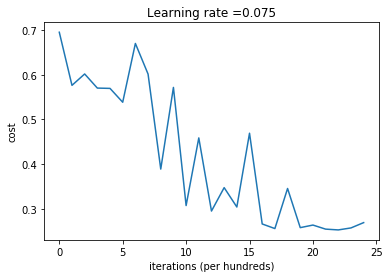

In [65]:
parameters_2 = L_layer_model(train_x, train_y, layers_dims_2, learning_rate=0.075 ,num_iterations = 2500, print_cost = True)

Accuracy: 1.0
y = 0.0, your algorithm predicts a "non-cat" picture.


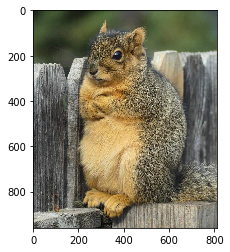

In [16]:
my_image = "squirrel.jpg" 
my_label_y = [0]                           # change this to the name of your image file 


# We preprocess the image to fit your algorithm.
fname = "images/" + my_image
image = np.array(skimage.io.imread(fname, as_gray=False))
image = image/255.
my_image = skimage.transform.resize(image, (num_px,num_px))
#my_image = my_image.reshape(my_image.shape[0],-1).T  
my_image = my_image.reshape(num_px*num_px*3,1) 

#my_image = skimage.transform.resize(my_image, (num_px*num_px*3,1))

my_predicted_image = predict(my_image, my_label_y, parameters)

#my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")



Accuracy: 1.0
y = 1.0, your algorithm predicts a "cat" picture.


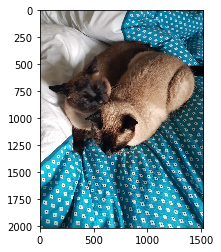

In [11]:
my_image = "chilon_and_newt1.jpg"
my_label_y = [1]                           # change this to the name of your image file 


#Preprocess the image to fit the algorithm.
fname = "images/" + my_image
image = np.array(skimage.io.imread(fname, as_gray=False))
image = image/255.
my_image = skimage.transform.resize(image, (num_px,num_px), anti_aliasing=True)
my_image = my_image.reshape(num_px*num_px*3,1) 



my_predicted_image = predict(my_image, my_label_y, parameters)

#my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")



Accuracy: 0.0
y = 1.0, your L-layer model predicts a "cat" picture.


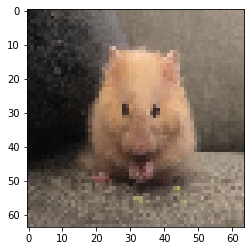

In [69]:

my_image = "Hamster.jpg" # change this to the name of your image file 
my_label_y = [0] # the true class of your image (1 -> cat, 0 -> non-cat)


## trained/test image are 64 x 64 x 3, flatten 
newsize = (64, 64) 

fname = "images/" + my_image

im1_np = np.asarray(Image.open(fname).resize(newsize).convert('RGB') )
plt.imshow(im1_np)

## we still need to flatten the array and rescale it, not done inline as we would like to show the image.
im1_np = im1_np.reshape(-1, 1)/255
my_predicted_image = predict(im1_np, my_label_y, parameters)

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")